#### Tazmeen Afroz
#### Roll No : 22P-9252
#### Assignment #03

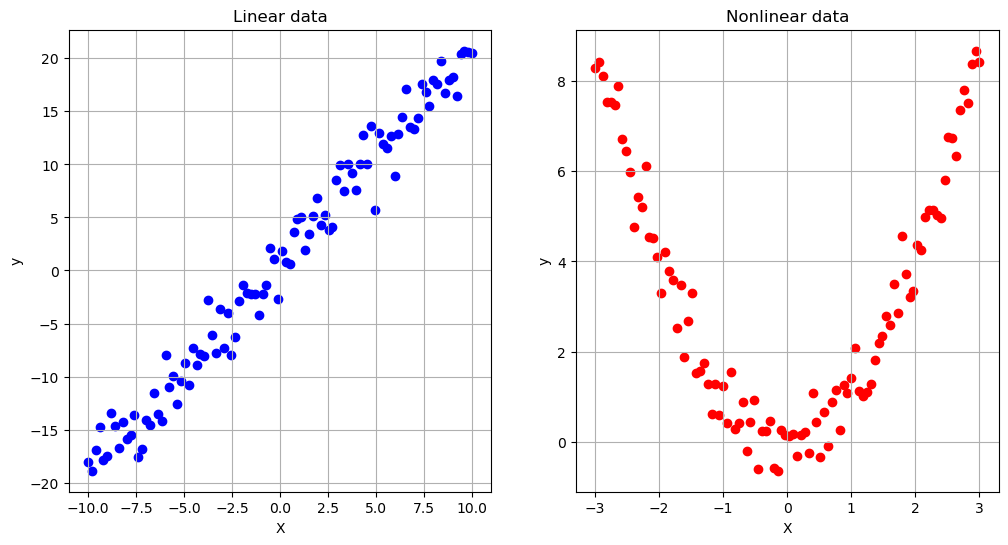

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
np.random.seed(42)

# Generate datasets
def generate_linear_data(n_samples=100):
    X = np.linspace(-10, 10, n_samples).reshape(-1, 1)
    y = 2 * X + 1 + np.random.randn(n_samples, 1) * 2
    return X, y

def generate_nonlinear_data(n_samples=100):
    X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = X**2 + np.random.randn(n_samples, 1) * 0.5
    return X, y

# Generate data
X_linear, y_linear = generate_linear_data()
X_nonlinear, y_nonlinear = generate_nonlinear_data()

# plot data 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_linear, y_linear, color='blue')
plt.title('Linear data')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_nonlinear, y_nonlinear, color='red')
plt.title('Nonlinear data')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()



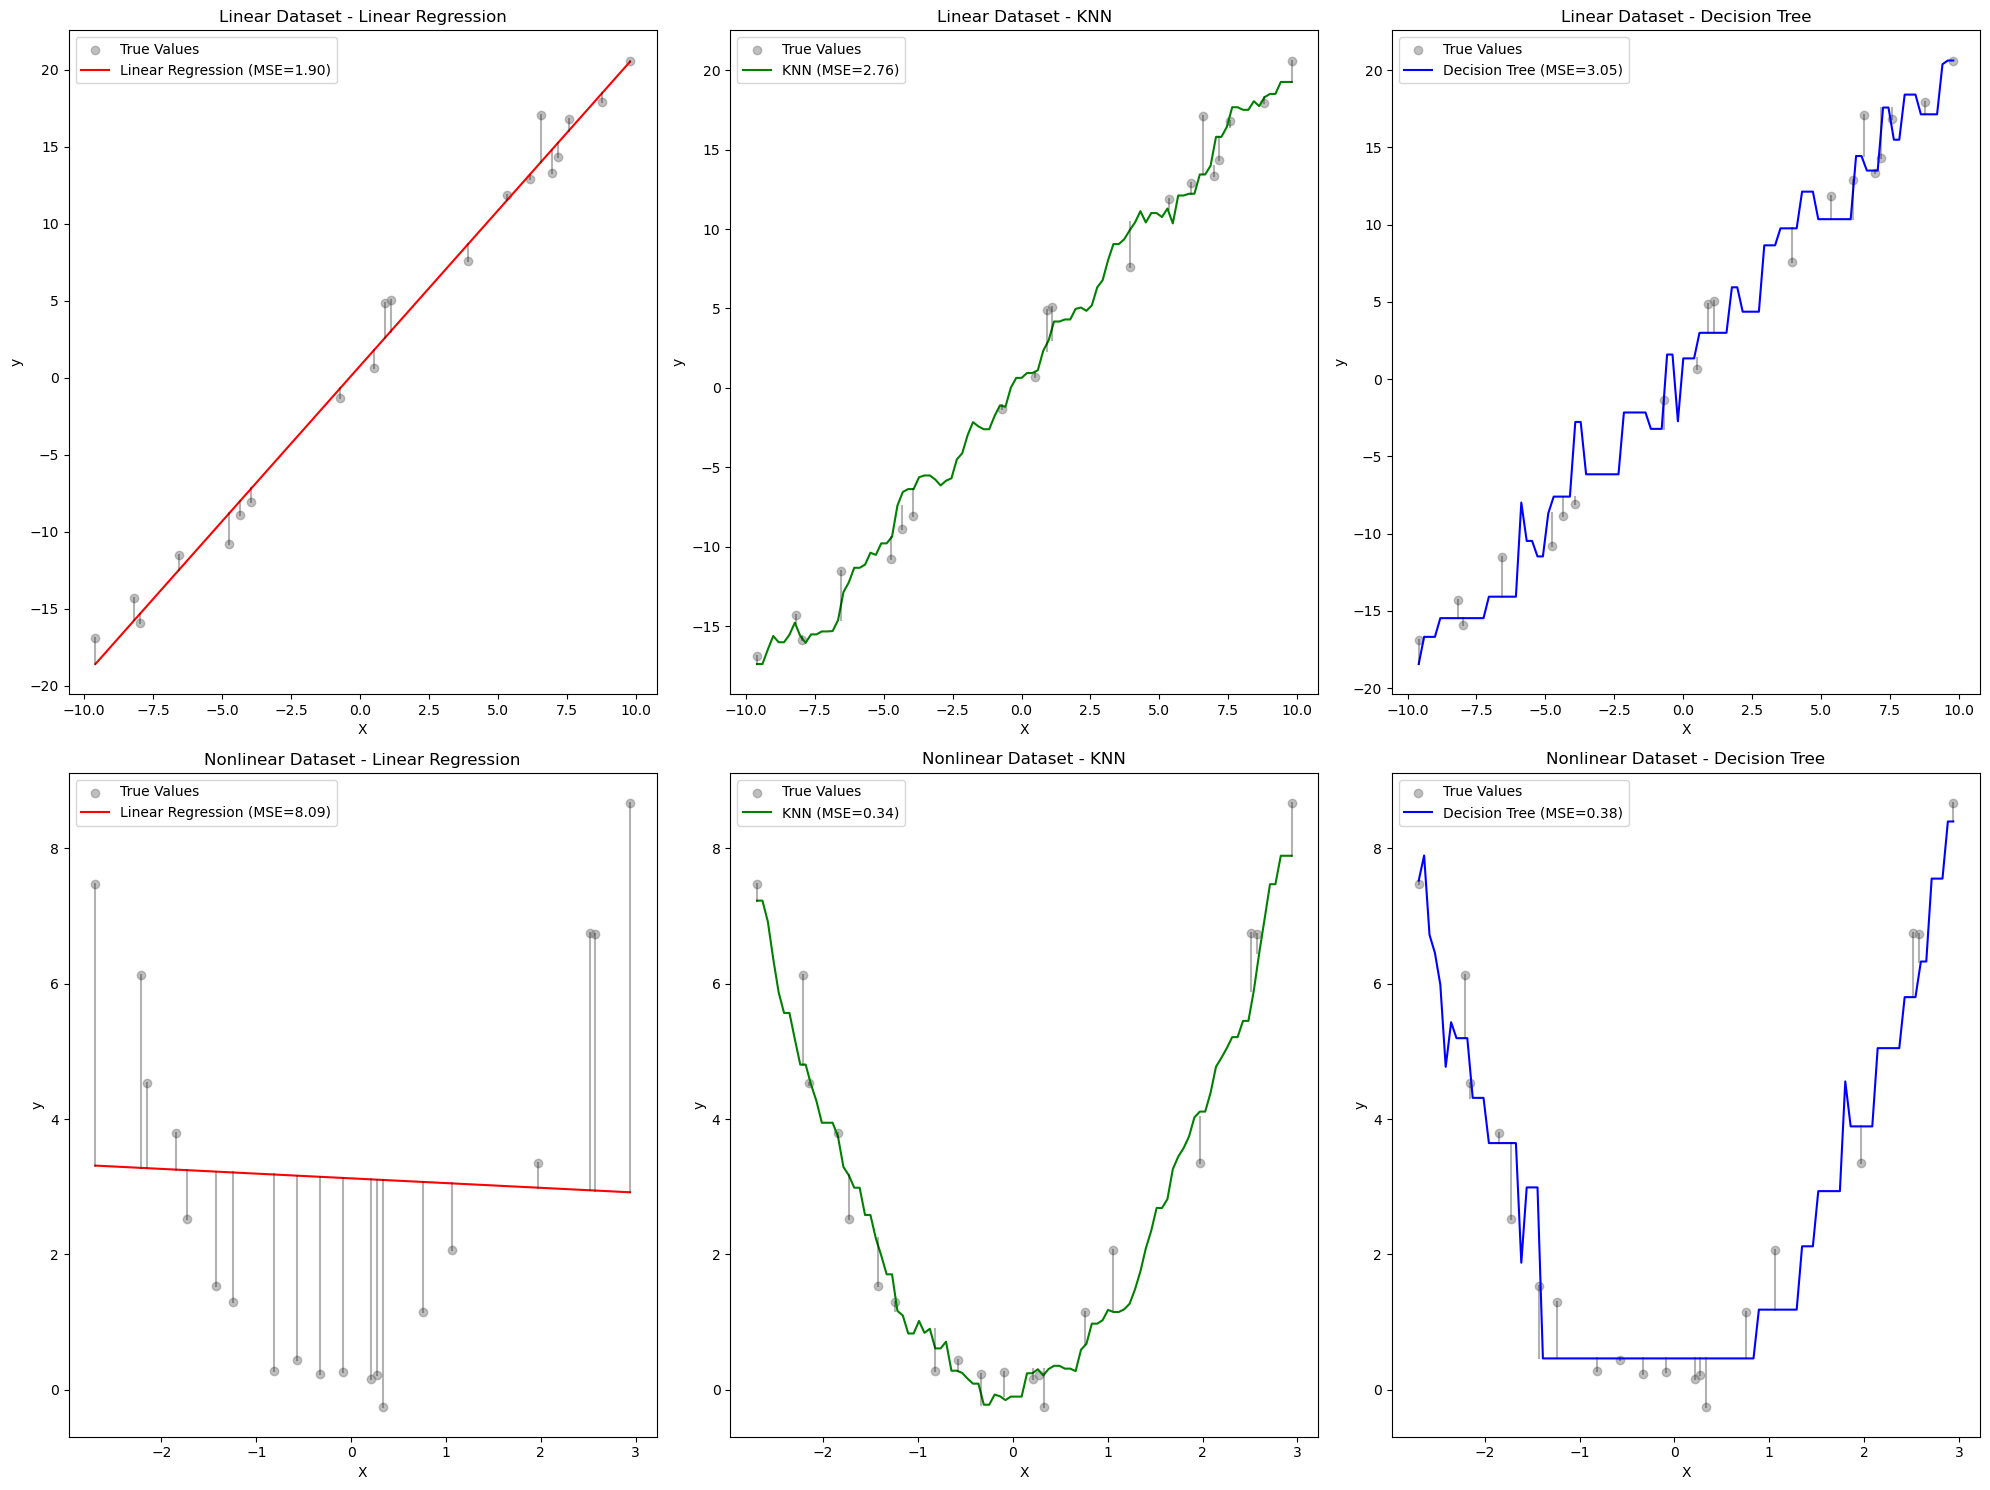


Linear Dataset Results:
Linear Regression: MSE = 1.8959
KNN: MSE = 2.7646
Decision Tree: MSE = 3.0536

Nonlinear Dataset Results:
Linear Regression: MSE = 8.0885
KNN: MSE = 0.3363
Decision Tree: MSE = 0.3753


In [25]:
# Split data
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_linear, y_linear, test_size=0.2)
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2)

# Initialize models
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
dt = DecisionTreeRegressor(max_depth=5)


# Train and predict
models = [lr, knn, dt]
model_names = ['Linear Regression', 'KNN', 'Decision Tree']
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 15))

for i, (X_train, X_test, y_train, y_test, title) in enumerate([
    (X_train_lin, X_test_lin, y_train_lin, y_test_lin, 'Linear Dataset'),
    (X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin, 'Nonlinear Dataset')
]):
    for j, (model, name, color) in enumerate(zip(models, model_names, colors)):
        plt.subplot(2, 3, i*3 + j + 1)
        
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test).reshape(-1, 1)
        mse = mean_squared_error(y_test, y_pred)
      
        
        # Plot true values
        plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='True Values')
        
        # Plot predicted values
        X_plot = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
        y_plot = model.predict(X_plot)
        plt.plot(X_plot, y_plot, color=color, label=f'{name} (MSE={mse:.2f})')
        
        # Plot distances
        for x, y_true, y_pred in zip(X_test.ravel(), y_test.ravel(), y_pred.ravel()):
            plt.plot([x, x], [y_true, y_pred], 'k-', alpha=0.3)
        
        plt.title(f'{title} - {name}')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()

plt.tight_layout()
plt.show()

# Print numerical results
for i, (X_train, X_test, y_train, y_test, title) in enumerate([
    (X_train_lin, X_test_lin, y_train_lin, y_test_lin, 'Linear Dataset'),
    (X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin, 'Nonlinear Dataset')
]):
    print(f"\n{title} Results:")
    for model, name in zip(models, model_names):
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
       
        print(f"{name}: MSE = {mse:.4f}")



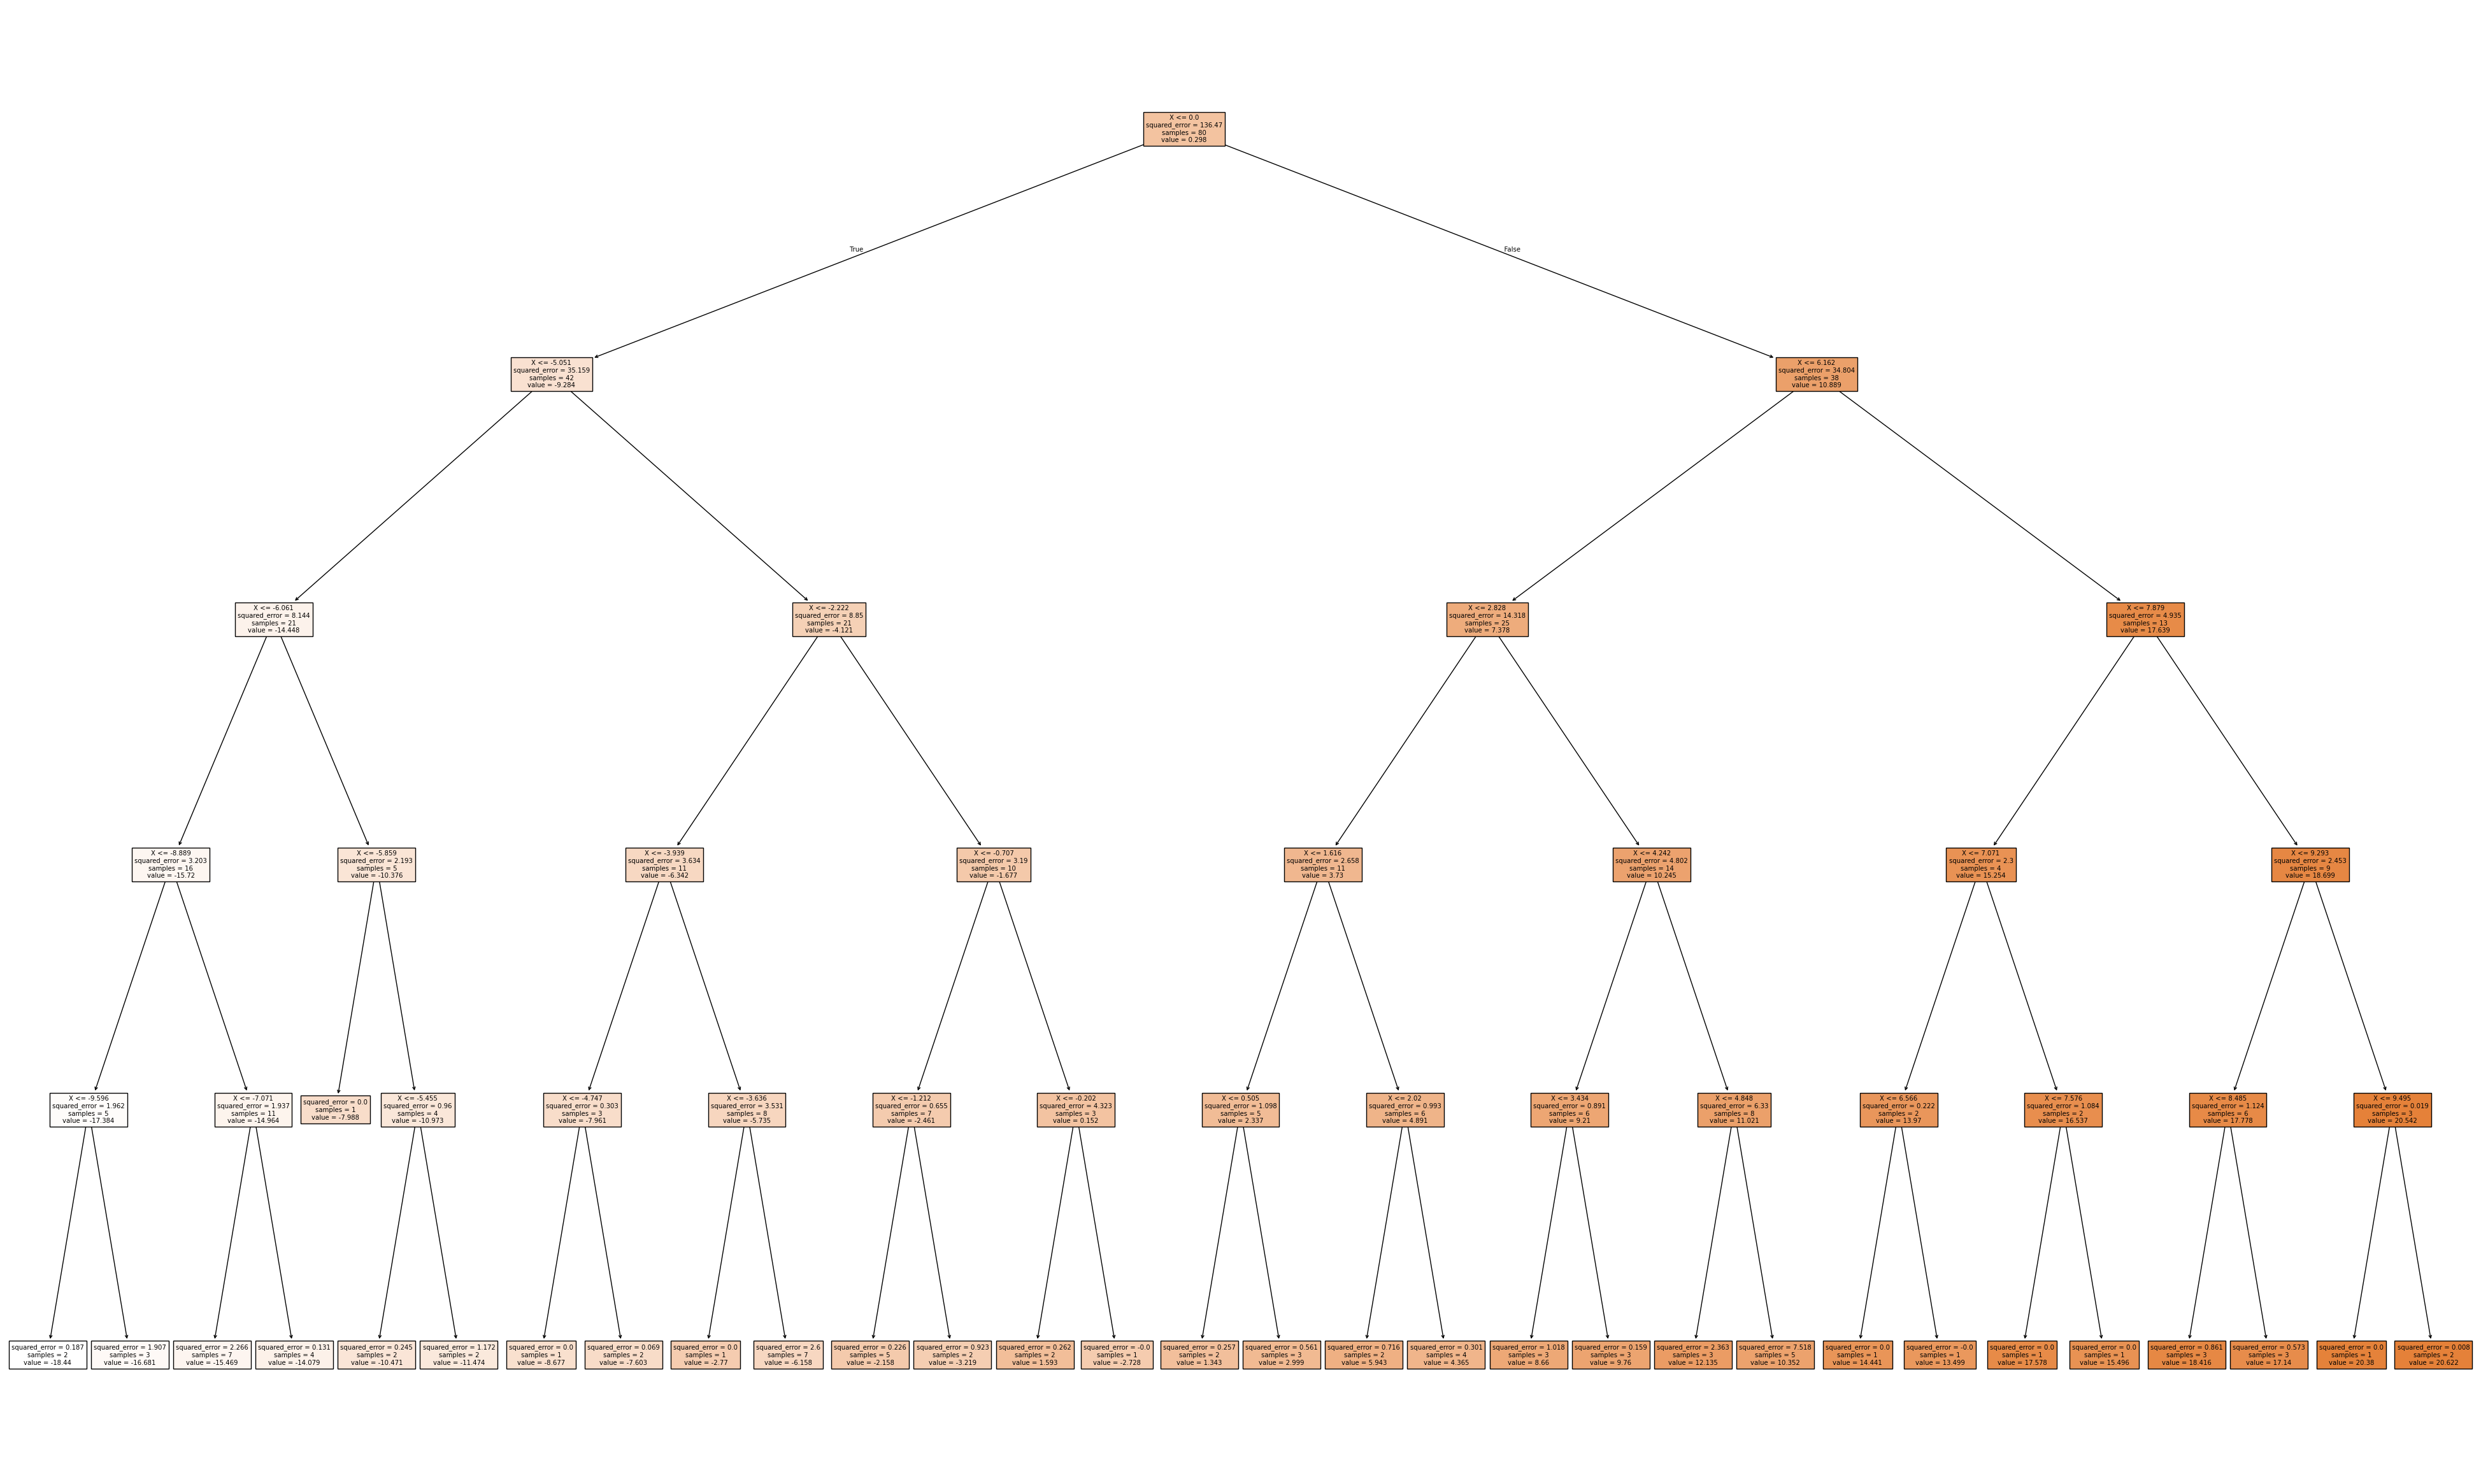

In [37]:
# Plot the decision tree for linear data and nonlinear data 

from sklearn.tree import plot_tree

# for linear data
plt.figure(figsize=(50, 30))
dt.fit(X_train_lin, y_train_lin)
plot_tree(dt, filled=True, feature_names=['X'])
plt.show()





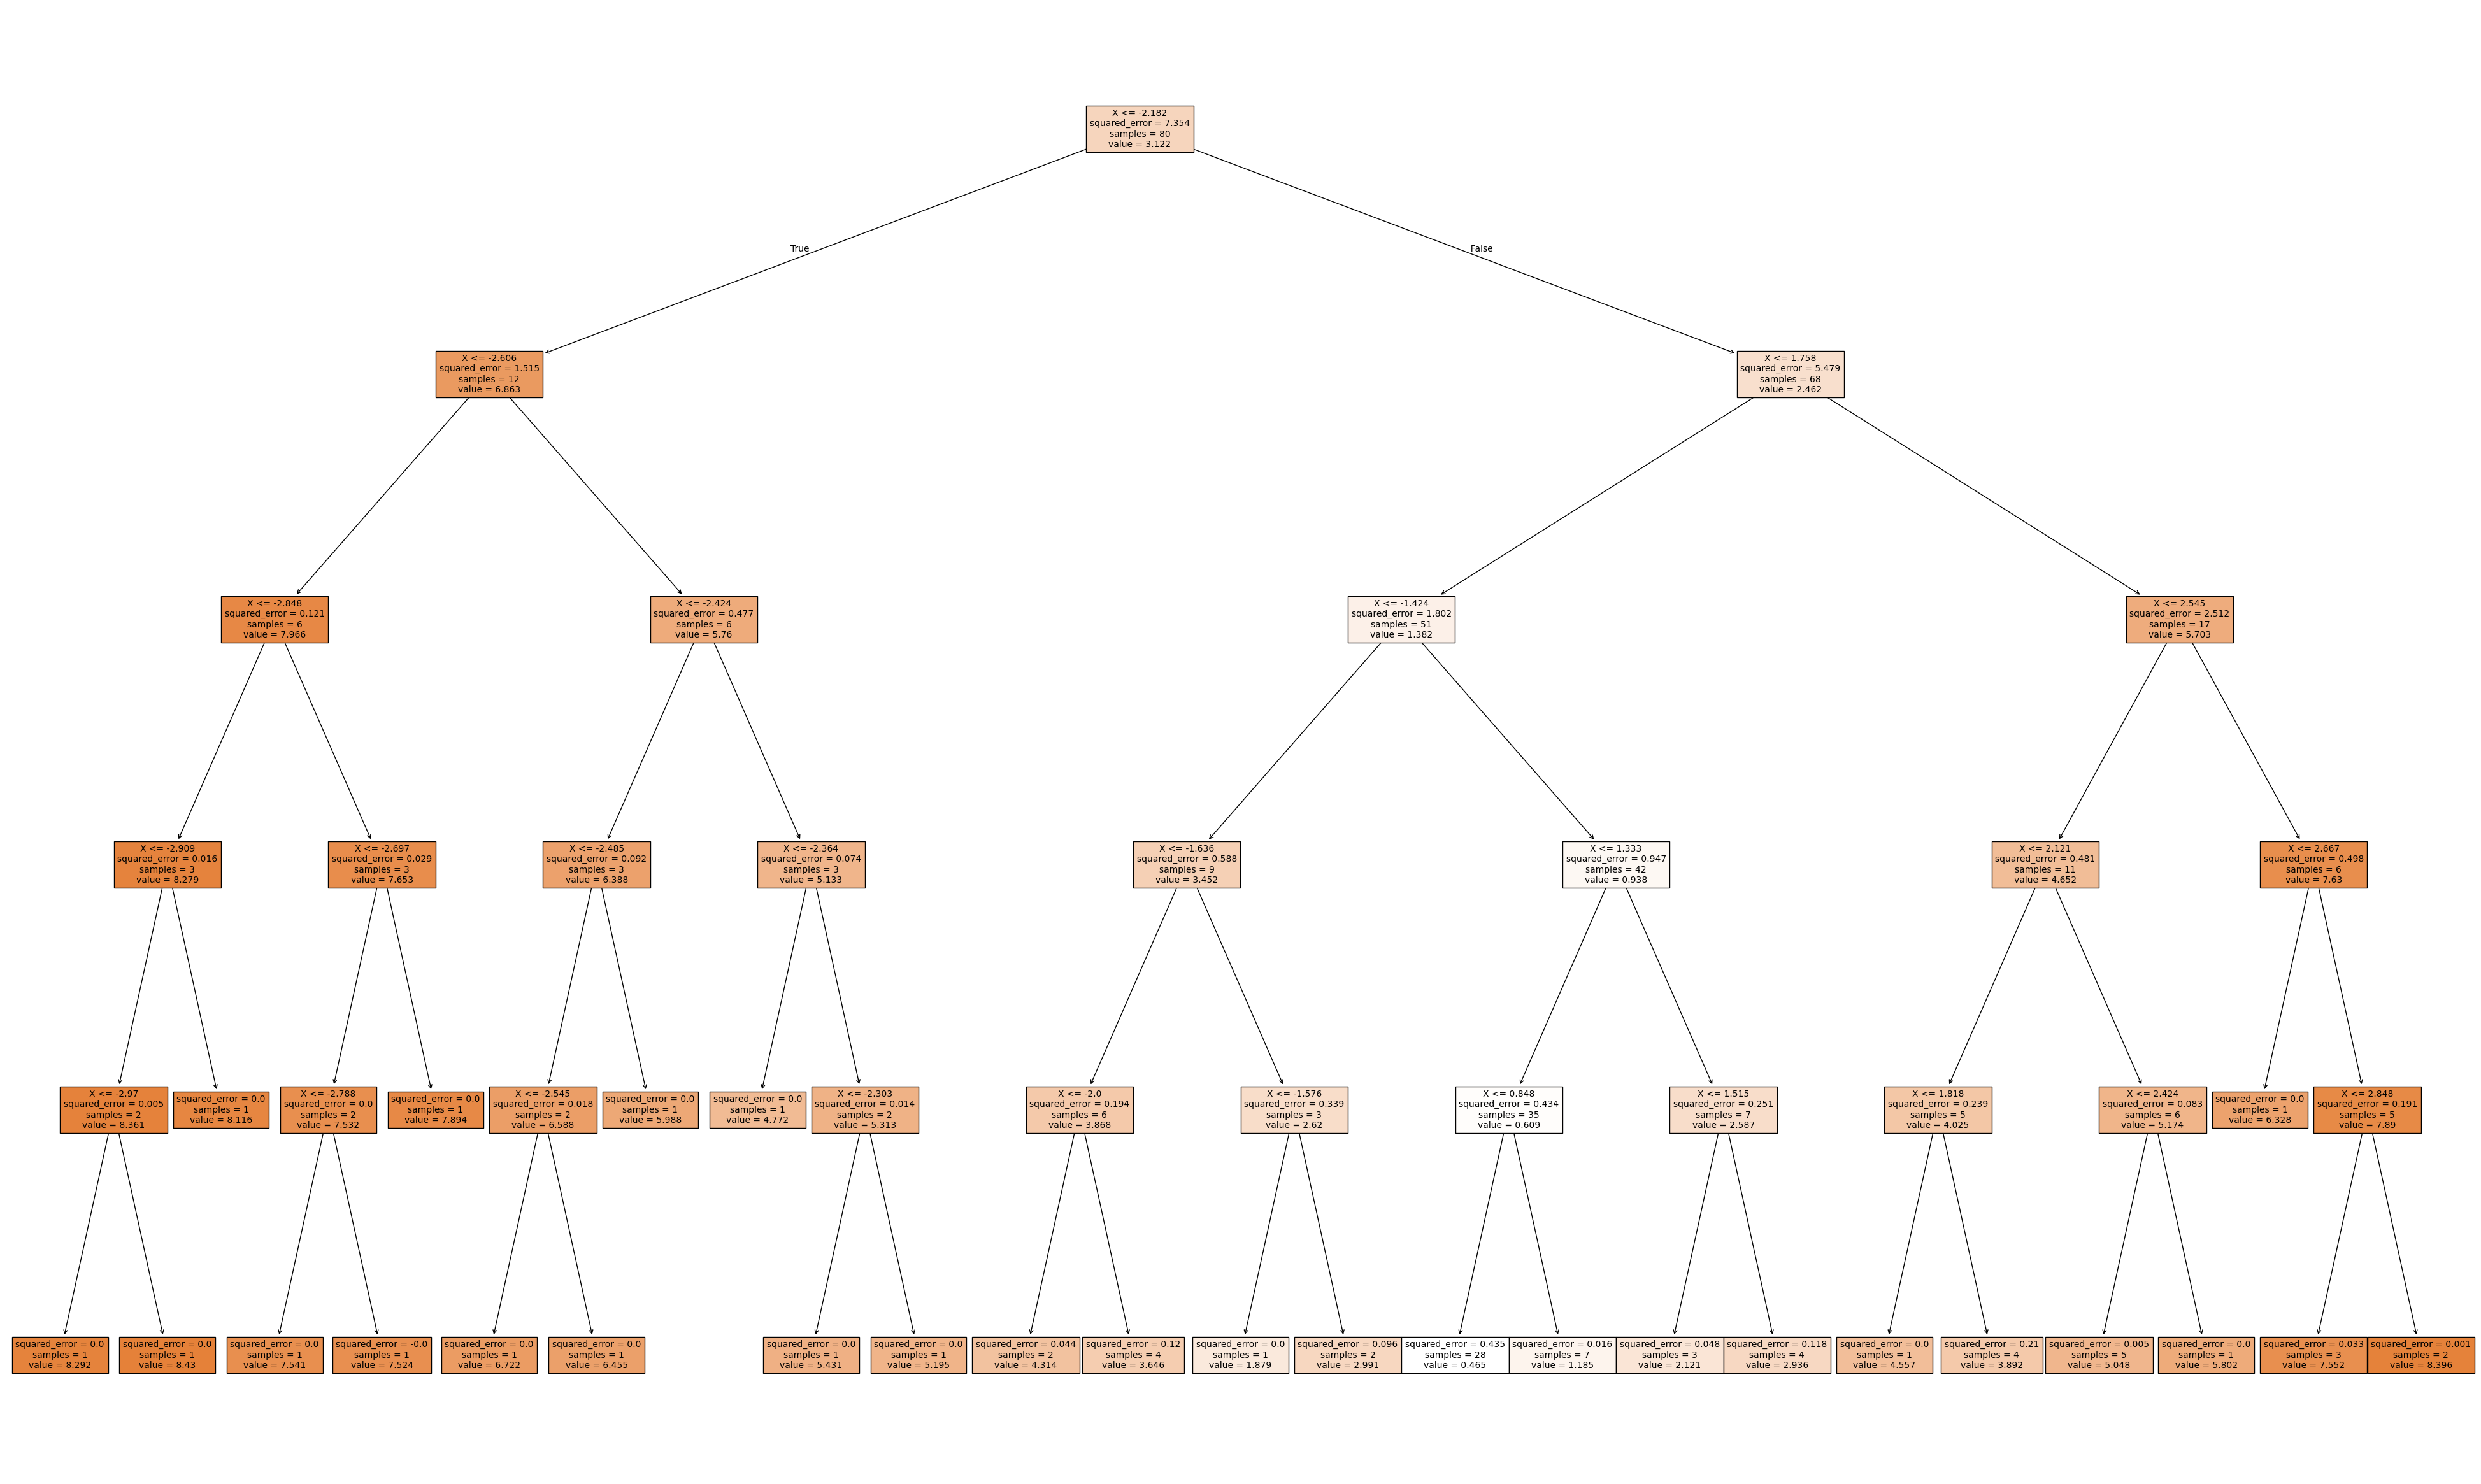

In [35]:
# for nonlinear data
plt.figure(figsize=(50, 30))
dt.fit(X_train_nonlin, y_train_nonlin)
plot_tree(dt, filled=True, feature_names=['X'])
plt.show()



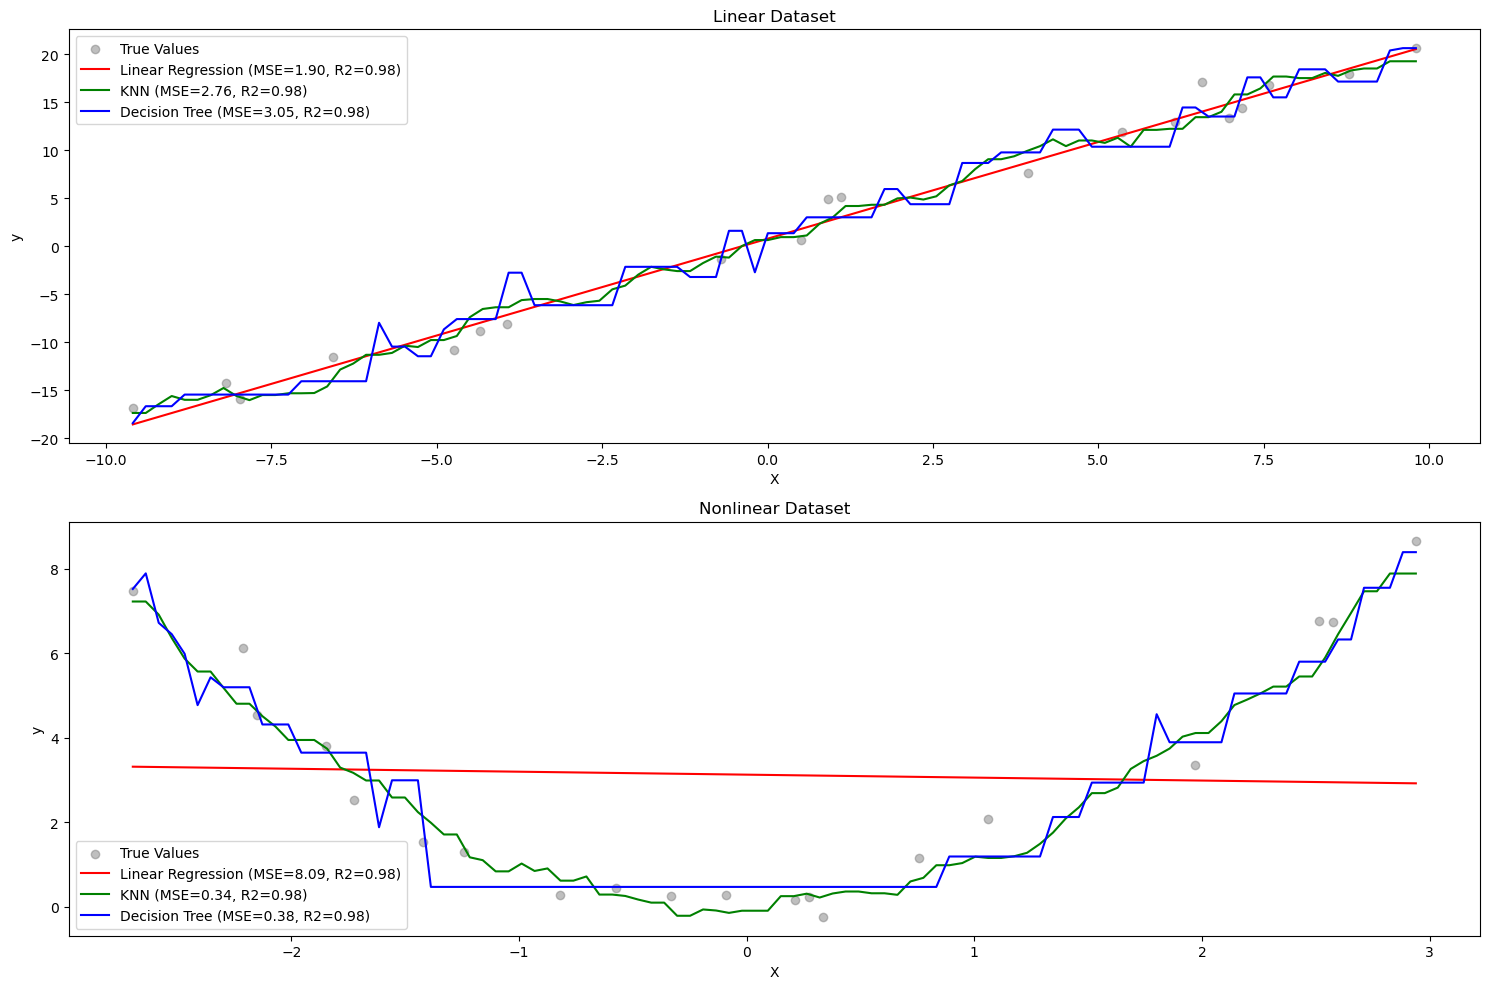

In [26]:
plt.figure(figsize=(15, 10))

for i, (X_train, X_test, y_train, y_test, title) in enumerate([
    (X_train_lin, X_test_lin, y_train_lin, y_test_lin, 'Linear Dataset'),
    (X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin, 'Nonlinear Dataset')
]):
    plt.subplot(2, 1, i+1)
    plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='True Values')
    
    for model, name, color in zip(models, model_names, colors):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
      
        
        X_plot = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
        y_plot = model.predict(X_plot)
        plt.plot(X_plot, y_plot, color=color, label=f'{name} (MSE={mse:.2f}, R2={r2:.2f})')
    
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

# Analysis of Linear and Nonlinear Dataset Results
====================================================

## Linear Dataset Results

| Model | MSE |
| --- | --- |
| Linear Regression | 1.8959 |
| KNN | 2.7646 |
| Decision Tree | 3.0536 |

### Why Linear Regression Performs Better

Linear Regression calculates predicted values using the formula:

$$y = \beta_0 + \beta_1x + \epsilon$$

where $\beta_0$ is the intercept, $\beta_1$ is the slope, $x$ is the input feature, and $\epsilon$ is the error term.

LR excels in linear datasets because it:

1. Assumes a linear relationship between features and target variable.
2. Minimizes the sum of squared errors (SSE) between predicted and actual values.

In this case, LR's lower MSE (1.8959) indicates better fit and accuracy.

### KNN and Decision Tree Performance

KNN and DT models struggle with linear datasets due to:

1. KNN: relying on local neighborhoods, which may not capture global linear trends.
2. DT: creating complex decision boundaries, leading to overfitting.

Their higher MSE values (2.7646 and 3.0536, respectively) reflect poorer performance.

## Nonlinear Dataset Results

| Model | MSE |
| --- | --- |
| Linear Regression | 8.0885 |
| KNN | 0.3363 |
| Decision Tree | 0.3753 |

### Why KNN and Decision Tree Perform Better

1. KNN: excels in nonlinear datasets by:
    - Capturing local patterns and relationships.
    - Adapting to complex decision boundaries.
2. DT: succeeds by:
    - Creating nonlinear decision boundaries.
    - Handling interactions between features.

KNN's and DT's lower MSE values (0.3363 and 0.3753, respectively) demonstrate superior performance.

### Linear Regression's Poor Performance

LR struggles with nonlinear datasets due to:

1. Linear assumptions, which fail to capture complex relationships.
2. Inability to adapt to nonlinear decision boundaries.

Its higher MSE value (8.0885) reflects poor fit and accuracy.

## Graph Analysis

Visual inspection of the graphs would likely reveal:

1. Linear dataset: LR's predicted values closely follow the actual values, while KNN and DT exhibit more scattered predictions.
2. Nonlinear dataset: KNN and DT predictions closely track the actual values, while LR predictions show significant deviations